# Q5

5. (Unsupervised labeling) This exercise concerns the classdemo.py file shared with
you. We saw that EM algorithm learnt the hidden parameters fairly well. This
question asks you to classify every point to each coin. Record the error rate of
this “classifier”.

In [95]:
# type: ignore

import numpy as np

# bias of coina
ta = 0.1

# bias of coinb
tb = 0.8

# the number of trials
d = 10

# total samples
n = 30

# hidden A =0 B=1
z = np.zeros(n)

# number of heads
x = np.zeros(n)

# For each trial, randomly choose whether to pick A or B
for i in range(n):
    if np.random.uniform() < 0.5:  # picking A
        x[i] = np.random.binomial(d, ta)  
        # np.random.binomial(n, p) returns a random number from binomial distribution = number of successes in n trials
    else:
        x[i] = np.random.binomial(d, tb) # picking B
        if np.random.uniform() < 0.5: 
            z[i] = 1

# print(x)
# print(z)

# forget zs
currAEst = 0.51  # current estimate of A
currBEst = 0.534  # current estimate of B

repeatcount = 1000  # instead of checking for convergence
gammaiA = np.zeros(n)  # creating a vector of zeros
gammaiB = np.zeros(n)

for i in range(repeatcount):
    # EStep starts
    for j in range(n):
        gammaiA[j] = 0.5 * np.power(currAEst, x[j]) * \
            np.power(1-currAEst, d-x[j])
        # mathematically,
        # gammaiA[j] = P(z[j] = 0 | x[j], theta) = P(x[j] | z[j] = 0, theta) * P(z[j] = 0 | theta) / P(x[j] | theta)
        gammaiA[j] /= (0.5*np.power(currAEst, x[j]) * np.power(1-currAEst, d-x[j]) +
                       0.5 * np.power(currBEst, x[j]) * np.power(1-currBEst, d-x[j]))
        gammaiB[j] = 1 - gammaiA[j]
    numA = denA = numB = denB = 0  # initializing
    # Estep ends


    # MStep starts
    for k in range(n):
        numA += gammaiA[k]*x[k]  # sum of gammaiA * x
        numB += gammaiB[k]*x[k]  # sum of gammaiB * x
        denA += gammaiA[k]*d    # Finding the denominator of the Mstep for A
        denB += gammaiB[k]*d    # Finding the denominator of the Mstep for B
    currAEst = numA/denA  # Finding the new estimate of A
    currBEst = numB/denB    # Finding the new estimate of B
    # Msteps ends

print(currAEst, currBEst)
# currAEst gives me he probability of coin being in cluster A
# currBEst gives me he probability of coin being in cluster B


0.12558814893032427 0.8088590721881882


<!-- This creates a boolean array of the same size as gammaiA and gammaiB, where each element is True if the corresponding element in gammaiA is less than the corresponding element in gammaiB, and False otherwise. Then, we cast this boolean array to an integer array using the astype method, which maps True to 1 and False to 0. -->

In [96]:
y_pred = (gammaiA < gammaiB).astype(int)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

<!-- Here's a more concise way to write the same code using NumPy:

makefile
Copy code
Perr = np.mean(y_pred != z)


The expression y_pred != z creates a boolean array of the same size as y_pred and z, where each element is True if the corresponding element in y_pred is not equal to the corresponding element in z, and False otherwise. We can then use the np.mean function to compute the proportion of elements in this array that are True, which gives us the error rate (Perr) as a fraction between 0 and 1.

Note that we don't need to initialize cntOfWrongPred to 0 and use np.float128 data type, since NumPy will automatically promote the data type to handle decimal calculations. -->

In [97]:
Perr = np.mean(y_pred != z)
Perr

0.23333333333333334

In [98]:
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns

confusionMat = sklearn.metrics.confusion_matrix(z, y_pred)
confusionMat


array([[14,  7],
       [ 0,  9]])

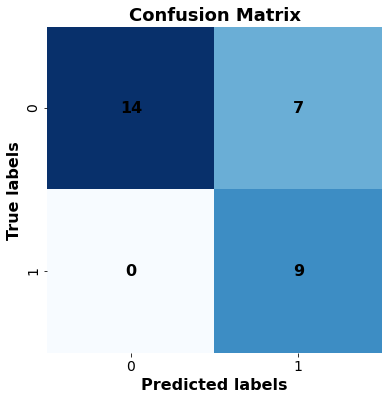

In [99]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusionMat, annot=True, cmap="Blues", fmt="d", cbar=False,
            annot_kws={"fontsize": 16, "fontweight": "bold", "color": "black"})
ax.set_xlabel("Predicted labels", fontsize=16, fontweight="bold")
ax.set_ylabel("True labels", fontsize=16, fontweight="bold")
ax.set_title("Confusion Matrix", fontsize=18, fontweight="bold")
ax.tick_params(labelsize=14)
plt.show()


# Q6

(Auto labeling with EM) In practice, availability of labelled datasets is difficult.
One approach is to cluster the dataset suitably and then retrospectively assign
label to each cluster. Using the approach described in Figure 9.10 of Bishop

cluster the MNIST dataset into 10 clusters using mixture of bernoulli distribu-
tions and then examine the average cluster. Thereafter, each cluster is labelled

based on the average cluster. Record, how many points were misclassified based
on this approach.

In [100]:
# !pip install cv2

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
from scipy.stats import multivariate_normal as mvn

In [102]:
# Load MNIST data using sklearn using load_digits and create a dataframe
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [103]:
# Binarize the data except the target column
df[df.columns[:-1]] = (df[df.columns[:-1]] > 0).astype(int)
df


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1
2,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,1,0,2
3,0,0,1,1,1,1,0,0,0,1,...,0,0,0,1,1,1,1,0,0,3
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,1,1,1,1,0,0,0,1,...,0,0,0,1,1,1,1,0,0,9
1793,0,0,1,1,1,1,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0
1794,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,1,1,1,0,0,8
1795,0,0,1,1,1,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,9


In [104]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.148024,0.760712,0.972176,0.979410,0.725654,0.238175,0.026711,0.003895,0.410684,...,0.064552,0.000556,0.121870,0.762382,0.961603,0.936561,0.728993,0.337229,0.061213,4.490818
std,0.0,0.355223,0.426767,0.164515,0.142046,0.446308,0.426085,0.161283,0.062309,0.492095,...,0.245802,0.023590,0.327226,0.425743,0.192207,0.243819,0.444604,0.472895,0.239788,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,7.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [105]:
# First Image as numpy array
df.iloc[0, :-1].values.reshape(8, 8)

array([[0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0]])

In [106]:
df.target.value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

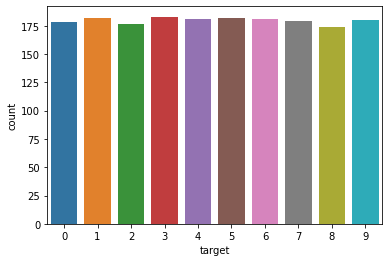

In [107]:
# Graph showing the count of all the digits
sns.countplot(df.target)
plt.show()

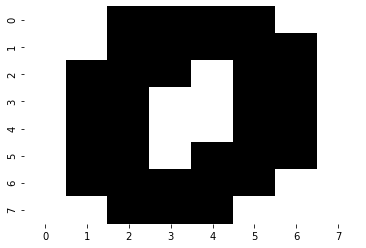

In [108]:
# Create the first image using seaborn
sns.heatmap(df.iloc[0, :-1].values.reshape(8, 8), cmap='binary', cbar=False)
plt.show()

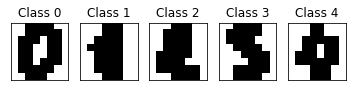

In [109]:
# Show first 5 images
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(df.iloc[i, :-1].values.reshape(8, 8), cmap='binary', interpolation='none')
    plt.title("Class {}".format(df.iloc[i, -1]))
    plt.xticks([])
    plt.yticks([])
plt.show()


In [110]:
def Estep(X, mu, pi):
    """Expectation step of the EM algorithm.
    
    Args:
        X (np.ndarray): Data matrix.
        mu (np.ndarray): Array of cluster means.
        pi (np.ndarray): Array of cluster weights.
    
    Returns:
        gamma (np.ndarray): Array of cluster assignments.
    """
    N=X.shape[0] # number of data points
    K=mu.shape[0] # number of clusters
    gamma=np.zeros((N,K)) # initialize gamma
    for i in range(N):
        for j in range(K):
            gamma[i,j]=pi[j]*mvn.pdf(X[i],mu[j],np.eye(X.shape[1]))
        gamma[i,:]/=np.sum(gamma[i,:])
    return gamma
   


In [111]:
def Mstep(X, gamma):
    '''
    Maximization step of the EM algorithm.
    
    Args:
        X (np.ndarray): Data matrix.
        gamma (np.ndarray): Array of cluster assignments.

    Returns:
        mu (np.ndarray): Array of cluster means.
        pi (np.ndarray): Array of cluster weights.

    '''
    N=X.shape[0] # number of data points
    K=gamma.shape[1] # number of clusters
    D=X.shape[1] # number of dimensions

    pi=np.sum(gamma,axis=0)/N
    mu=np.zeros((K,D))
    
    for j in range(K):
        for i in range(N):
            mu[j]+=gamma[i,j]*X[i]
        mu[j]/=np.sum(gamma[:,j])

    return mu, pi



In [112]:
# type: ignore
def logLikelihood(X, gamma, mu, pi):
    '''
    Compute the log-likelihood of the data given the current parameters.

    Args:
        X (np.ndarray): Data matrix.
        gamma (np.ndarray): Array of cluster assignments.
        mu (np.ndarray): Array of cluster means.
        pi (np.ndarray): Array of cluster weights.

    Returns:
        llh (float): Log-likelihood of the data.
        
    '''
    N=X.shape[0] # number of data points
    K=gamma.shape[1] # number of clusters
    llh=0 # initialize log-likelihood

    for i in range(N):
        for j in range(K):
            llh+=gamma[i,j]*np.log(pi[j]*mvn.pdf(X[i],mu[j],np.eye(X.shape[1])))
    return llh




In [115]:
def EM(df, K, delta=5):
    '''
    EM algorithm for fitting a mixture of Bernoulli distributions.

    Args:
        df (pd.DataFrame): Dataframe containing the data.
        K (int): Number of clusters.
        delta (float): Convergence threshold.

    Returns:
        mu (np.ndarray): Array of cluster means.
        pi (np.ndarray): Array of cluster weights.
        gamma (np.ndarray): Array of cluster assignments.
        llh (float): Log-likelihood of the data.

    '''
    X = df.iloc[:, :-1].values  # data matrix
    N = X.shape[0]  # number of data points
    D = X.shape[1]  # number of dimensions

    # initialize mu, pi, and gamma
    mu = np.zeros((K, D))
    for i in range(0, K):
        mu[i] = np.random.uniform(0, 1, size=D)

    # Init gamma
    gamma = np.zeros((N, K))
    for i in range(0, N):
        gamma[i] = np.random.uniform(0, 1, size=K)
        gamma[i] = gamma[i] / np.sum(gamma[i])

    # Working with pi
    pi = np.random.uniform(low=0.25, high=0.75, size=K)
    total = np.sum(pi)
    pi = pi/total

    # logLikelihood
    curr_llh = np.float(1e9)
    prev_llh = np.float(0)
    iter = 0
    while np.abs(curr_llh-prev_llh) > delta:
        iter += 1
        gamma = Estep(X, mu, pi)
        mu, pi = Mstep(X, gamma)
        prev_llh = curr_llh
        curr_llh = logLikelihood(X, gamma, mu, pi)
        print("Iteration: {}, Log-likelihood: {}".format(iter, curr_llh))

    labels = np.argmax(gamma, axis=1)
    print("Final Log-likelihood: {}".format(curr_llh))
    return mu, pi, gamma, curr_llh, labels


In [116]:
K=3
mu, pi, gamma, llh, labels = EM(df, K)

Iteration: 1, Log-likelihood: -114600.63743839279
Iteration: 2, Log-likelihood: -114645.70089568685
Iteration: 3, Log-likelihood: -114660.48549815055
Iteration: 4, Log-likelihood: -114669.19946979306
Iteration: 5, Log-likelihood: -114675.05889923245
Iteration: 6, Log-likelihood: -114679.21105274936
Final Log-likelihood: -114679.21105274936


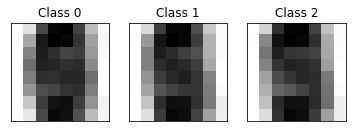

In [117]:
# Plot 8X8 images of the means
for i in range(0, K):
    plt.subplot(1, K, i+1)
    plt.imshow(mu[i].reshape(8, 8), cmap='binary', interpolation='none')
    plt.title("Class {}".format(i))
    plt.xticks([])
    plt.yticks([])
plt.show()


In [118]:
y_pred= np.zeros(gamma.shape[0])
y_pred
for i in range(gamma.shape[0]):
    y_pred[i]=np.argmax(gamma[i,:])
y_pred

array([0., 2., 2., ..., 2., 2., 2.])

In [119]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(df.iloc[:,-1],y_pred)


0.1229827490261547

In [120]:
# Misclassified points 
misclassified = np.where(y_pred != df.iloc[:,-1])
misclassified

(array([   1,    3,    4, ..., 1794, 1795, 1796]),)

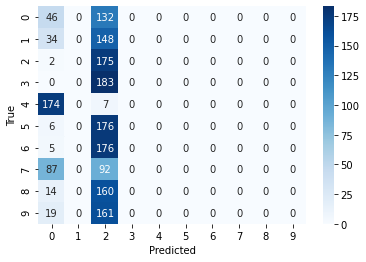

In [122]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(df.iloc[:,-1],y_pred)
# Heatmap with true labels on y-axis and predicted labels on x-axis
import seaborn as sns
sns.heatmap(confusion_matrix(df.iloc[:,-1],y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Q7

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
from scipy.special import erfinv


In [2]:
N = 10000   # number of data points

p1 = 0.05  # probability of class 1
p0 = 0.95 # probability of class 0

dataset=np.array([[]])  # initialize dataset

In [3]:
y = np.random.binomial(1, p1, N)
x = np.where(y == 0, np.random.normal(0, 1, N), np.random.normal(1, 1, N))
dataset = np.column_stack((x, y))


In [4]:
dataset.shape

(10000, 2)

In [6]:
df=pd.DataFrame(dataset,columns=['X','Y'])
df.head()

,X,Y
0,-0.632294,0.0
1,-2.027101,0.0
2,-1.025401,0.0
3,-0.250462,0.0
4,-0.969030,0.0


In [8]:
def f0(x, mu=0, sigma=1):
    x = float(x - mu) / sigma
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma


def f1(x, mu=1, sigma=1):
    x = float(x - mu) / sigma
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma


In [10]:
Hb = np.zeros(N)

for i in range(0, N):
  y = df.iloc[i][1]
  x = df.iloc[i][0]
  Q1 = (p1*f1(x))/(p1*f1(x)+p0*f0(x))
  Q0 = (p0*f0(x))/(p1*f1(x)+p0*f0(x))
  if Q1 >= Q0:
    Hb[i] = 1
  else:
    Hb[i] = 0


In [11]:
df['Hb'] = Hb
df.head()

,X,Y,Hb
0,-0.632294,0.0,0.0
1,-2.027101,0.0,0.0
2,-1.025401,0.0,0.0
3,-0.250462,0.0,0.0
4,-0.969030,0.0,0.0


In [12]:
import numpy as np

f = np.zeros((2, 2))
idx1 = df.iloc[:, 1] == 1
idx2 = df.iloc[:, 2] == 1
f[0][0] = np.sum(idx1 & idx2)
f[1][0] = np.sum(idx1 & ~idx2)
f[0][1] = np.sum(~idx1 & idx2)
f[1][1] = np.sum(~idx1 & ~idx2)


In [13]:
f

array([[5.000e+00, 1.000e+00],
       [4.950e+02, 9.499e+03]])

In [15]:
TP=f[0][0]
TN=f[1][1]
FP=f[0][1]
FN=f[1][0]

In [16]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision: " + str(precision))
print("Recall: " + str(recall))


Precision: 0.8333333333333334
Recall: 0.01


In [18]:
confusionMat = sklearn.metrics.confusion_matrix(df['Y'], df['Hb'])
confusionMat


array([[9499,    1],
       [ 495,    5]])

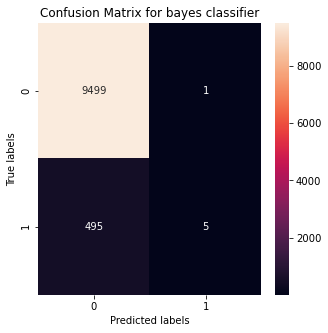

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(confusionMat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for bayes classifier')
plt.show()


In [22]:
cntOfWrongPred = np.sum(y != Hb)
Perr = cntOfWrongPred / N
Perr


0.0006

# For Neyman Pearson classifier

In [24]:
df2 = pd.DataFrame(dataset, columns=['X', 'Y'])
df2.head()


,X,Y
0,-0.632294,0.0
1,-2.027101,0.0
2,-1.025401,0.0
3,-0.250462,0.0
4,-0.969030,0.0


# Q2 (d)
 According to neyman pearson classifier, let us say the type 1 error that is Probability of false alarm is upper bounded by some alpha, then the classifier would predict class 1 if f1/f0 > K where K is such that P(f1/f0<=K | X belongs to class 0)=1-alpha.
 Using these calculations, for the class conditional densities given in question, classifier would predict class 1 if X>tau, where  tau = erfinverse(1-2*alpha)*(2^(1/2))


In [26]:
alpha=0.2
tau=erfinv(1-2*alpha)*(math.sqrt(2))

In [27]:
y_pred = np.zeros(df2.shape[0])
y_pred[df2['X'] > tau] = 1


In [30]:
sklearn.metrics.accuracy_score(y_pred,df2["Y"])

0.7883

In [35]:
confusionMat=sklearn.metrics.confusion_matrix(df2['Y'],y_pred)
confusionMat



array([[7602, 1898],
       [ 219,  281]])

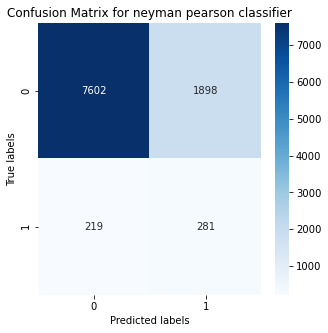

In [36]:

ax= plt.subplots(figsize=(5,5))

ax=sns.heatmap(confusionMat, annot=True, fmt='g',cmap='Blues');

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for neyman pearson classifier'); 

## Q2 (e)
#### ROC curve is a plot between Probability of correct detection and Probability of false alarm for different thresholds.
#### H(x)=1 if x>=tau
#### H(x)=0 if x < tau
#### So Pcd=1-P(x <= tau | X belongs to class 1) Pfa=P(x>tau | X belongs to class 0)
#### By elimination tau from these two equations, we would get a relationship between Pcd and Pfa which has been shown in function "calc"


In [43]:
def calc(Pfa):
    Pcd=-(math.erf(erfinv(1-2*Pfa)-1.0/math.sqrt(2))-1.0)/2.0
    return Pcd


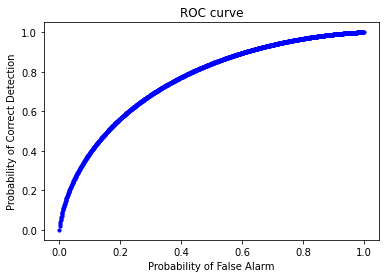

In [44]:
Pfas=np.linspace(0,1,1000)
for i in range(0,len(Pfas)):
    plt.scatter(Pfas[i],calc(Pfas[i]),s=10,c=["b"])
plt.title("ROC curve")
plt.ylabel("Probability of Correct Detection")
plt.xlabel("Probability of False Alarm")
plt.show()

## Q2 (f)
#### Considering that cost of P(h(x)!=y|y=0) and P(h(x)!=y|y=1) are equal
#### Therefore for the minimax classifier, integration of f1 over R0 is equal to integration of f0 over R1, by solving this equation, we would get R0 and R1. In this case, by solving this equation, R0 is for x<0.5 and R1 is for x>=0.5

In [45]:
y_pred=np.zeros(df2.shape[0])
for i in range(0,df2.shape[0]):
    if df2.iloc[i]['X']>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0


In [46]:
sklearn.metrics.accuracy_score(y_pred,df2["Y"])

0.6961

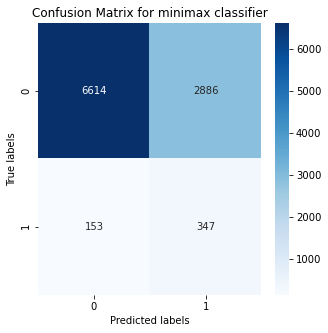

In [47]:
confusionMat=sklearn.metrics.confusion_matrix(df2['Y'],y_pred)
confusionMat
ax= plt.subplots(figsize=(5,5))

ax=sns.heatmap(confusionMat, annot=True, fmt='g',cmap='Blues');

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for minimax classifier'); 